# Ejercicio 4

In [29]:
import numpy as np

# Cargar los datos
D1 = np.load("archivo_01.npy")
N1 = len(D1)

In [30]:
# Creación de los t
t = np.linspace(0, 1, N1)

In [31]:
def resolverP(M, D):
    # Resolver el sistema de ecuaciones normales
    MT_M = M.T @ M
    MT_D = M.T @ D
    MT_M_inv = np.linalg.inv(MT_M)

    # Obtener los puntos de control
    P = MT_M_inv @ MT_D
    return P


# Construir la matriz M
M1 = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
# Resolver P
P1 = resolverP(M1, D1)


In [32]:
# Calcular el error cuadrático total
def get_aproximacion(M, P):
    return M @ P

def get_error(D, aproximacion):
    return np.sum((D - aproximacion)**2)

aproximacion1 = get_aproximacion(M1, P1)
error1 = get_error(D1, aproximacion1)
print(f"Error de aproximación: {error1:.4f}")


Error de aproximación: 91.7137


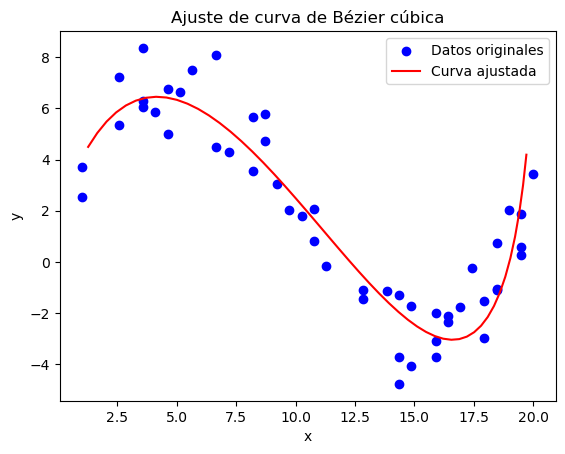

In [33]:
import matplotlib.pyplot as plt

# Graficar los puntos originales
plt.scatter(D1[:, 0], D1[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion1[:, 0], aproximacion1[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()


# Ejercicio 5

In [34]:
# Cargar los datos
D2 = np.load("archivo_02.npy")
N2 = len(D2)

In [35]:
# Creación de los t
t = np.linspace(0, 1, N2)

In [36]:
# Construir la matriz M
M2 = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])

# Obtener los puntos de control
P2 = resolverP(M2, D2)

In [37]:
# Calcular el error cuadrático total
aproximacion2 = M2 @ P2
error2 = np.sum((D2 - aproximacion2)**2)
print(f"Error de aproximación: {error2:.4f}")

Error de aproximación: 417040.6086


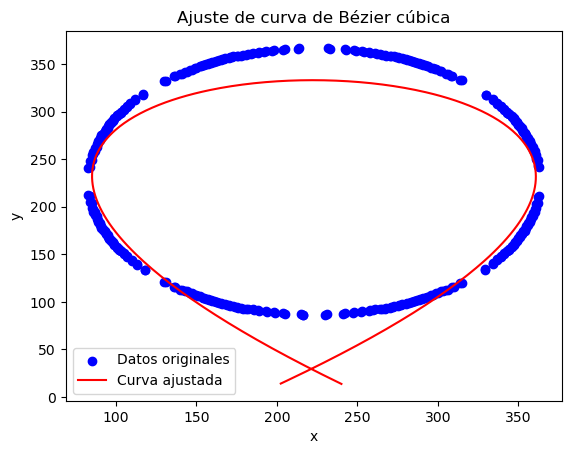

In [38]:
# Graficar los puntos originales
plt.scatter(D2[:, 0], D2[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion2[:, 0], aproximacion2[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()

# Ejercicio 6

### División de los datos en dos grupos

In [39]:
#Buscar el punto medio de los datos para dividirlos en 2 grupos
media_x = np.mean(D2[:, 0])

D_left = D2[D2[:, 0] < media_x]
D_right = D2[D2[:, 0] >= media_x]

In [40]:
Ms = [] # Matrices M
Ps = [] # Puntos de control de las curvas
# Para cada subconjunto de datos calcular M y P
for subset in [D_left, D_right]:
    # Construir la matriz M
    t = np.linspace(0, 1, len(subset))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Obtener los puntos de control
    P_aux = resolverP(M_aux, subset)
    Ps.append(P_aux)


In [41]:
tags = {0: 'izquierda', 1: 'derecha'}
aproximaciones1 = []
error=0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = get_aproximacion(Ms[i], Ps[i])
    aproximaciones1.append(aproximacion_aux)
    error_aux = get_error(subset, aproximacion_aux)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 89733.2389
Error de aproximación del conjunto derecha: 21621.1076
Error de aproximación: 111354.3465


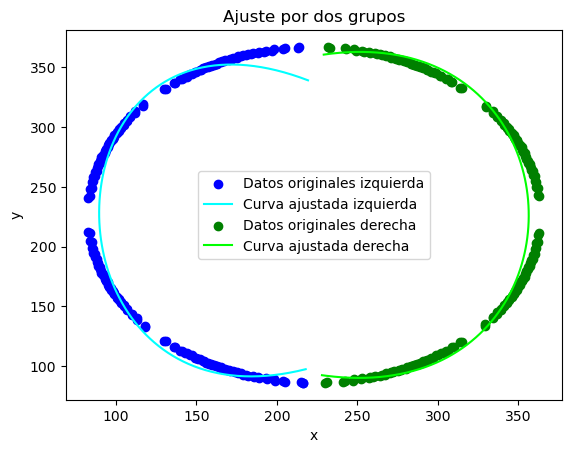

In [42]:
colors1 = {0: 'blue', 1: 'green'}
colors2 = {0: 'cyan', 1: 'lime'}
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones1[i][:, 0], aproximaciones1[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste por dos grupos')
plt.show()

### Agregando coninuidad $C^0$

In [43]:
def unir_curvas_c0(puntos1, puntos2):
    '''Modifica los puntos de control de puntos1 y puntos2'''
    p3_1 = puntos1[-1]
    p3_2 = puntos2[0]

    medio_1 = (1/2) * (p3_1 + p3_2)

    puntos1[-1] = medio_1
    puntos2[0] = medio_1


for union in range(2):
    puntos1 = Ps[union]
    puntos2 = Ps[(union+1)%2]

    unir_curvas_c0(puntos1, puntos2)

aproximaciones2 = []
error = 0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = get_aproximacion(Ms[i], Ps[i])
    aproximaciones2.append(aproximacion_aux)
    error_aux = get_error(subset, aproximacion_aux)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 94708.0708
Error de aproximación del conjunto derecha: 26571.4980
Error de aproximación: 121279.5688


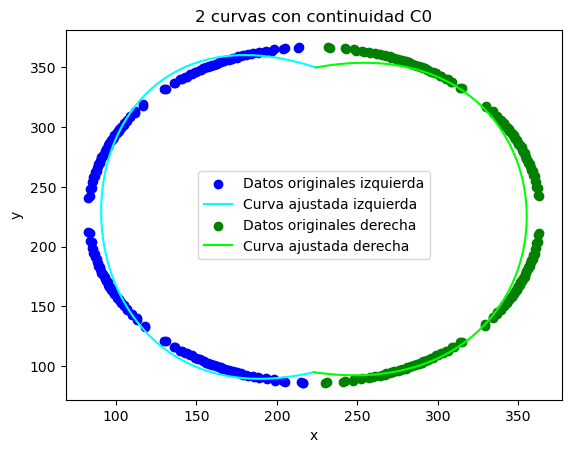

In [44]:
# Volver a graficar, ahora con continuidad C0
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones2[i][:, 0], aproximaciones2[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('2 curvas con continuidad C0')
plt.show()

### Agregando continuidad $C^1$

In [45]:
def unir_curvas_c1(puntos1, puntos2):
    '''Modifica los puntos de control de puntos1 y puntos2'''
    p2 = puntos1[2]
    p4 = puntos2[1]

    medio_1 = (1/2) * (p2 + p4)

    puntos1[-1] = medio_1
    puntos2[0] = medio_1


for union in range(2):
    puntos1 = Ps[union]
    puntos2 = Ps[(union+1)%2]

    unir_curvas_c1(puntos1, puntos2)

aproximaciones3 = []
error = 0
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones3.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    error += error_aux
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto izquierda: 296448.3892
Error de aproximación del conjunto derecha: 143141.2615
Error de aproximación: 439589.6507


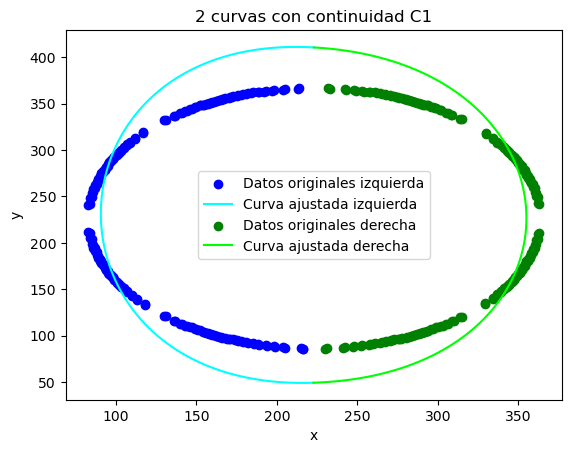

In [46]:
# Volver a graficar, ahora con continuidad C1
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones3[i][:, 0], aproximaciones3[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('2 curvas con continuidad C1')
plt.show()

### Division en más subgrupos

In [47]:
def subdividir(D, k):
    Ds = []
    N = len(D)
    j = round(N/k)
    for i in range(k):
        Ds.append(D[i*j:(i+1)*j])
    return Ds

# Seccionar los datos en 30 sectores
Ds = subdividir(D2, 30)

In [48]:
Ms = [] # Matrices M
Ps = [] # Puntos de control de las curvas
# Para cada subconjunto de datos calcular M y P
for i, d in enumerate(Ds):
    # Construir la matriz M
    t = np.linspace(0, 1, len(d))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Obtener los puntos de control
    P_aux = resolverP(M_aux, d)
    Ps.append(P_aux)

In [49]:
aproximaciones4 = []
error = 0
for i, d in enumerate(Ds):
    aproximacion_aux = get_aproximacion(Ms[i], Ps[i])
    aproximaciones4.append(aproximacion_aux)
    error_aux = get_error(d, aproximacion_aux)
    error += error_aux
    print(f"Error de aproximación del conjunto {i}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto 0: 22.1149
Error de aproximación del conjunto 1: 1.6786
Error de aproximación del conjunto 2: 1.6349
Error de aproximación del conjunto 3: 49.4431
Error de aproximación del conjunto 4: 10.5979
Error de aproximación del conjunto 5: 1.8574
Error de aproximación del conjunto 6: 2.1029
Error de aproximación del conjunto 7: 330.2220
Error de aproximación del conjunto 8: 3.1938
Error de aproximación del conjunto 9: 1.4368
Error de aproximación del conjunto 10: 3.5609
Error de aproximación del conjunto 11: 95.1953
Error de aproximación del conjunto 12: 2.4156
Error de aproximación del conjunto 13: 1.3069
Error de aproximación del conjunto 14: 3.2590
Error de aproximación del conjunto 15: 95.7645
Error de aproximación del conjunto 16: 2.2258
Error de aproximación del conjunto 17: 1.0552
Error de aproximación del conjunto 18: 4.9316
Error de aproximación del conjunto 19: 165.8661
Error de aproximación del conjunto 20: 2.5260
Error de aproximación del conjunto 

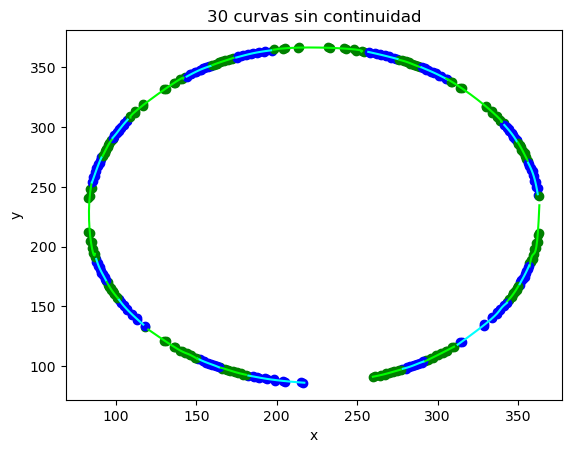

In [50]:
# Definimos dos colores que vayan alternando entre los grupos para distinguirlos mejor
colores1 = {0: 'blue', 1: 'green'}
colores2 = {0: 'cyan', 1: 'lime'}

for i, d in enumerate(Ds):
    subset = d
    # Graficar los puntos originales de cada grupo
    plt.scatter(subset[:, 0], subset[:, 1], color=f"{colores1[i%2]}", label=f'Datos originales {i}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones4[i][:, 0], aproximaciones4[i][:, 1], color=f"{colores2[i%2]}", label=f'Curva ajustada {i}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('30 curvas sin continuidad')
plt.show()

In [51]:
for i in range(len(Ps)):
    puntos1 = Ps[i]
    puntos2 = Ps[(i+1)%len(Ps)]

    unir_curvas_c1(puntos1, puntos2)

error = 0
aproximaciones5 = []
for i, d in enumerate(Ds):
    aproximacion_aux = get_aproximacion(Ms[i], Ps[i])
    aproximaciones5.append(aproximacion_aux)
    error_aux = get_error(d, aproximacion_aux)
    error += error_aux
    print(f"Error de aproximación del conjunto {i}: {error_aux:.4f}")

print(f"Error de aproximación: {error:.4f}")

Error de aproximación del conjunto 0: 531.2234
Error de aproximación del conjunto 1: 6.4008
Error de aproximación del conjunto 2: 35.2610
Error de aproximación del conjunto 3: 253.6842
Error de aproximación del conjunto 4: 442.2472
Error de aproximación del conjunto 5: 3.2596
Error de aproximación del conjunto 6: 108.9241
Error de aproximación del conjunto 7: 939.5380
Error de aproximación del conjunto 8: 307.8150
Error de aproximación del conjunto 9: 10.3671
Error de aproximación del conjunto 10: 44.6855
Error de aproximación del conjunto 11: 419.6913
Error de aproximación del conjunto 12: 135.3126
Error de aproximación del conjunto 13: 7.3636
Error de aproximación del conjunto 14: 16.4037
Error de aproximación del conjunto 15: 275.9711
Error de aproximación del conjunto 16: 52.8826
Error de aproximación del conjunto 17: 1.7129
Error de aproximación del conjunto 18: 157.2211
Error de aproximación del conjunto 19: 499.7479
Error de aproximación del conjunto 20: 42.5477
Error de aproxim

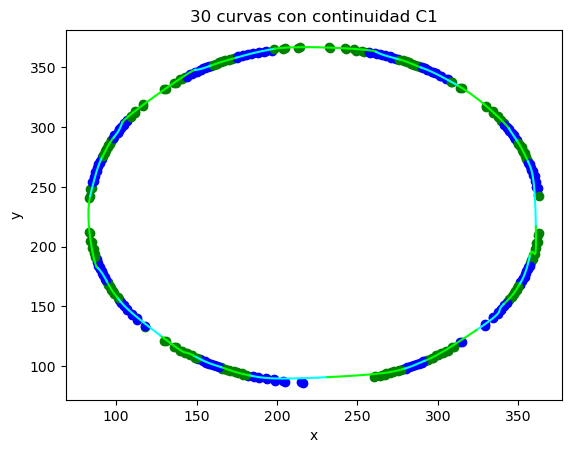

In [52]:
# Volver a graficar, ahora con continuidad C1
for i, d in enumerate(Ds):
    # Graficar los puntos originales de cada grupo
    plt.scatter(d[:, 0], d[:, 1], color=f"{colores1[i%2]}", label=f'Datos originales {i}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones5[i][:, 0], aproximaciones5[i][:, 1], color=f"{colores2[i%2]}", label=f'Curva ajustada {i}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
#plt.legend()
plt.title('30 curvas con continuidad C1')
plt.show()

Error de aproximación del conjunto 0: 2860.0504
Error de aproximación del conjunto 1: 123.9551
Error de aproximación del conjunto 2: 69.0446
Error de aproximación del conjunto 3: 339.9118
Error de aproximación del conjunto 4: 499.7028
Error de aproximación del conjunto 5: 782.3791
Error de aproximación del conjunto 6: 1575.0037
Error de aproximación del conjunto 7: 121.2105
Error de aproximación del conjunto 8: 14.1249
Error de aproximación del conjunto 9: 8.8890
Error de aproximación del conjunto 10: 2.9897
Error de aproximación del conjunto 11: 6.3589
Error de aproximación del conjunto 12: 2.0195
Error de aproximación del conjunto 13: 148.2452
Error de aproximación del conjunto 14: 103.8822
Error de aproximación del conjunto 15: 10.7843
Error de aproximación del conjunto 16: 140.6671
Error de aproximación del conjunto 17: 168.7645
Error de aproximación del conjunto 18: 135.5721
Error de aproximación del conjunto 19: 15.1563
Error de aproximación del conjunto 20: 266.1652
Error de apr

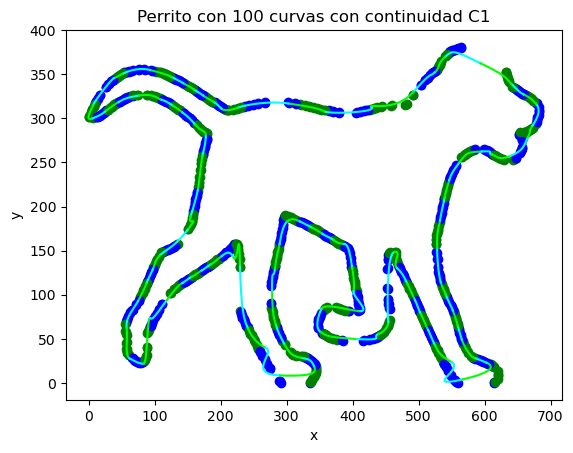

In [53]:
D3 = np.load("archivo_03.npy")
N3 = len(D3)

# Creación de los t
t = np.linspace(0, 1, N3)

# Subdividir los datos en 30 sectores
Ds = subdividir(D3, 100)

Ms = [] # Matrices M
Ps = [] # Puntos de control de las curvas
# Para cada subconjunto de datos calcular M y P
for i, d in enumerate(Ds):
    # Construir la matriz M
    t = np.linspace(0, 1, len(d))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Obtener los puntos de control
    P_aux = resolverP(M_aux, d)
    Ps.append(P_aux)

for i in range(len(Ps)):
    puntos1 = Ps[i]
    puntos2 = Ps[(i+1)%len(Ps)]

    unir_curvas_c1(puntos1, puntos2)

aproximaciones6 = []
error = 0
for i, d in enumerate(Ds):
    aproximacion_aux = get_aproximacion(Ms[i], Ps[i])
    aproximaciones6.append(aproximacion_aux)
    error_aux = get_error(d, aproximacion_aux)
    error += error_aux
    print(f"Error de aproximación del conjunto {i}: {error_aux:.4f}")
print(f"Error de aproximación: {error:.4f}")

for i, d in enumerate(Ds):
    # Graficar los puntos originales de cada grupo
    plt.scatter(d[:, 0], d[:, 1], color=f"{colores1[i%2]}", label=f'Datos originales {i}')

    # Graficar la curva ajustada de cada grupo
    plt.plot(aproximaciones6[i][:, 0], aproximaciones6[i][:, 1], color=f"{colores2[i%2]}", label=f'Curva ajustada {i}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
#plt.legend()
plt.title('Perrito con 100 curvas con continuidad C1')
plt.show()